<a href="https://colab.research.google.com/github/myrondza10/economic_indicators_scoring_fx_calendar/blob/main/FRED_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi

In [ ]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

fred_key = ''


In [ ]:
fred = Fred(api_key=fred_key)

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500

,0
2014-11-10,2038.26
2014-11-11,2039.68
2014-11-12,2038.25
2014-11-13,2039.33
2014-11-14,2039.82
...,...
2024-11-04,5712.69
2024-11-05,5782.76
2024-11-06,5929.04
2024-11-07,5973.10


In [ ]:
# Retrieve the raw data from FRED
df = fred.get_series('UNRATE', observation_start='2006-1-1', frequency = 'm')
df.hvplot(title = "Unemployment Rate")

:Curve   [index]   (0)

In [ ]:
df2 = fred.get_series_first_release('UNRATE')

# use concat to combine the 2 Series types
combine = pd.concat([df,df2], join = 'inner', axis = 1)
combine.columns = ['unrevised', 'revised']

# Plot
combine.hvplot(title = 'Revised Vs Unrevised: Unemployment Rate',
               y = ['unrevised', 'revised'],
               color = ['blue','gray'], grid = True)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
fred.search("Australia CPI")

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
AUSCPIALLQINMEI,AUSCPIALLQINMEI,2024-11-09,2024-11-09,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1948-07-01,2024-04-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-08-15 13:58:04-05:00,22,OECD Data Filters: REF_AREA: AUS MEASURE: CPI...
AUSCPALTT01IXNBQ,AUSCPALTT01IXNBQ,2024-11-09,2024-11-09,Consumer Price Index: All Items: Total for Aus...,1960-01-01,2023-07-01,Quarterly,Q,Index source base,Index source base,Not Seasonally Adjusted,NSA,2023-11-17 12:00:08-06:00,4,OECD Descriptor ID: CPALTT01 OECD unit ID: IDX...
AUSCPIALLAINMEI,AUSCPIALLAINMEI,2024-11-09,2024-11-09,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1949-01-01,2023-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-05-15 14:02:29-05:00,3,OECD Data Filters: REF_AREA: AUS MEASURE: CPI...
CCRETT01AUM661N,CCRETT01AUM661N,2024-11-09,2024-11-09,Financial Market: Real Effective Exchange Rate...,1972-01-01,2024-09-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-10-15 14:11:12-05:00,5,OECD Data Filters: REF_AREA: AUS MEASURE: CCR...
CCRETT01AUQ661N,CCRETT01AUQ661N,2024-11-09,2024-11-09,Financial Market: Real Effective Exchange Rate...,1972-01-01,2024-07-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-10-15 14:18:57-05:00,1,OECD Data Filters: REF_AREA: AUS MEASURE: CCR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12AUA156NWDB,DDDI12AUA156NWDB,2024-11-09,2024-11-09,Private Credit by Deposit Money Banks and Othe...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:33:22-05:00,1,Private credit by deposit money banks and othe...
DDDI08AUA156NWDB,DDDI08AUA156NWDB,2024-11-09,2024-11-09,Financial System Deposits to GDP for Australia,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:33:35-05:00,1,"Demand, time and saving deposits in deposit mo..."
DDDM07AUA156NWDB,DDDM07AUA156NWDB,2024-11-09,2024-11-09,Outstanding Total International Debt Securitie...,1980-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:32:35-05:00,1,Amount of international debt securities (amoun...


In [ ]:
columns = ['AUS','JAP','USA','GBR','KOR']

aus = fred.get_series('NGDPRSAXDCAUQ')
jap = fred.get_series('JPNRGDPEXP')
us = fred.get_series('GDPC1')
uk = fred.get_series('NGDPRSAXDCGBQ')
korea = fred.get_series('NGDPRSAXDCKRQ')

#Combine all the single series, only take common dates using "inner"
gdp_global = pd.concat([aus, jap, us, uk, korea], join='inner', axis=1)

# Creare YoY Real GDP (divided by 4 because we have quarterly data) & Drop NA's
gdp_global = ((gdp_global / gdp_global.shift(4)) - 1).dropna(axis = 0)

gdp_global.columns = columns

# Plot
gdp_global.hvplot(title = 'Global GDP', grid = True)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
# Extract the 10Y Government Bond Yields for each country (make quarterly):
aus_y = fred.get_series('IRLTLT01AUM156N', frequency = 'q')
jap_y = fred.get_series('IRLTLT01JPM156N', frequency = 'q')
us_y = fred.get_series('IRLTLT01USM156N', frequency = 'q')
uk_y = fred.get_series('IRLTLT01GBM156N', frequency = 'q')
korea_y = fred.get_series('IRLTLT01KRM156N', frequency = 'q')

# Combine again
global_10y_yields = pd.concat([aus_y, jap_y, us_y, uk_y, korea_y], join='inner', axis=1)

global_10y_yields.columns = columns

# Plot
global_10y_yields.hvplot(title = 'Global 10Y Yields', grid = True)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
cpi = fred.get_series('CPIAUCNS')
cpi = pd.DataFrame(cpi, columns=['Inflation'])
cpi.index.name = 'Date'
cpi.index = pd.to_datetime(cpi.index)
cpi.hvplot(title = 'CPI US', grid = True)

:Curve   [Date]   (Inflation)

In [ ]:
mortgage = fred.get_series(series_id='MORTGAGE30US')
mortgage.hvplot(title = 'MORTGAGE US', grid = True)

:Curve   [index]   (0)

In [ ]:
ir = fred.get_series('EFFR')
ir.hvplot(title = 'INTEREST RATES US', grid = True)

:Curve   [index]   (0)

In [ ]:
# Plot TB10 & TB2 on same chart overlapping
TB10 = fred.get_series('DGS10')
TB2 = fred.get_series('DGS2')
TB10.hvplot(title = '10 YEAR 2 YEAR Treasury Bond', grid = True) * TB2.hvplot(grid = True)

:Overlay
   .Curve.A_0.I  :Curve   [index]   (0)
   .Curve.A_0.II :Curve   [index]   (0)

In [ ]:
# Calculate Bond Yield 10 Year 2 Year
TB10_2 = TB10 - TB2
TB10_2.hvplot(title = 'Bond Yield 10 Year 2 Year', grid = True)

:Curve   [index]   (0)

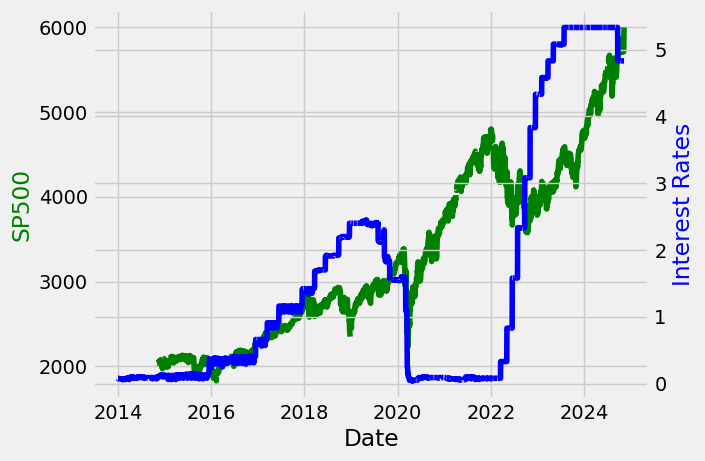

In [ ]:
# Plot sp500 and interest rates on same graph with secondary axis using matplotlib from 2014 and inflation rate

import matplotlib.pyplot as plt

sp500 = fred.get_series(series_id='SP500')
sp500 = pd.DataFrame(sp500, columns=['sp500'])
sp500.index.name = 'Date'
sp500.index = pd.to_datetime(sp500.index)

ir = fred.get_series('EFFR')
ir = pd.DataFrame(ir, columns=['ir'])
ir.index.name = 'Date'
ir.index = pd.to_datetime(ir.index)

sp500_ir = pd.concat([sp500, ir], axis=1)
sp500_ir = sp500_ir['2014':]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(sp500_ir.index, sp500_ir['sp500'], 'g-')
ax2.plot(sp500_ir.index, sp500_ir['ir'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('SP500', color='g')
ax2.set_ylabel('Interest Rates', color='b')
plt.show()